In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score


In [3]:
train = pd.read_csv('../data/dbs/train.csv')
test = pd.read_csv('../data/dbs/test.csv')

In [284]:
train.head()

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_36614,2011-01-12 00:00:00,2018-02-18 15:56:00,0.0,Torbie,0.11,9.51,13,9,1,1
1,ANSL_22109,2015-07-24 00:00:00,2015-10-14 12:06:00,2.0,Brown Tabby,0.42,48.74,0,2,0,1
2,ANSL_27582,2016-12-02 00:00:00,2017-02-11 14:24:00,2.0,Black,0.90,34.45,13,9,1,1
3,ANSL_637,2015-07-05 00:00:00,2015-10-13 17:40:00,1.0,Flame Point,0.94,48.91,7,1,0,1
4,ANSL_27541,2016-01-16 00:00:00,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,2


## Basic Exploration

In [115]:
print(f"The number of records in train: {train.shape}")
print(f"The number of records in test: {test.shape}")

The number of records in train: (13991, 11)
The number of records in test: (5997, 9)


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13991 entries, 0 to 13990
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_sale_id     13991 non-null  object 
 1   issue_date      13991 non-null  object 
 2   listing_date    13991 non-null  object 
 3   condition       12935 non-null  float64
 4   color_type      13991 non-null  object 
 5   length(m)       13991 non-null  float64
 6   height(cm)      13991 non-null  float64
 7   X1              13991 non-null  int64  
 8   X2              13991 non-null  int64  
 9   breed_category  13991 non-null  int64  
 10  pet_category    13991 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.2+ MB


### Missing value

In [117]:
train.isnull().sum()

pet_sale_id          0
issue_date           0
listing_date         0
condition         1056
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

There are some missing value in the 'condition' column. Need to impute with some value 

### Lets explore each column one by one

In [118]:
train.columns

Index(['pet_sale_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [119]:
train.head()

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_36614,2011-01-12 00:00:00,2018-02-18 15:56:00,0.0,Torbie,0.11,9.51,13,9,1,1
1,ANSL_22109,2015-07-24 00:00:00,2015-10-14 12:06:00,2.0,Brown Tabby,0.42,48.74,0,2,0,1
2,ANSL_27582,2016-12-02 00:00:00,2017-02-11 14:24:00,2.0,Black,0.90,34.45,13,9,1,1
3,ANSL_637,2015-07-05 00:00:00,2015-10-13 17:40:00,1.0,Flame Point,0.94,48.91,7,1,0,1
4,ANSL_27541,2016-01-16 00:00:00,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,2


1. PET SALE ID

In [120]:
train['pet_sale_id'].nunique()

13991

In [121]:
train[train['pet_sale_id'] == 'ANSL_27541']

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
4,ANSL_27541,2016-01-16 00:00:00,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,2


In [122]:
# Lets keep this column for now as this is going to be our input column for our final prediction. 
# Note: There is a little confusion here on how just the sale id going to predict

2. Condition

In [123]:
train['condition'].unique()

array([ 0.,  2.,  1., nan])

In [124]:
train['condition'].value_counts()

1.0    4997
0.0    4611
2.0    3327
Name: condition, dtype: int64

In [125]:
train['condition'].mode()

0    1.0
Name: condition, dtype: float64

Lets impute the null values with mode values of this columns

In [126]:
value = train['condition'].mode()[0]

print(value)

train['condition'].fillna(value, inplace=True)

1.0


In [127]:
train['condition'].value_counts()

1.0    6053
0.0    4611
2.0    3327
Name: condition, dtype: int64

In [128]:
train.isnull().sum()

pet_sale_id       0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

3. Color Type

In [129]:
train['color_type'].value_counts()

Black              3364
White              1703
Brown              1427
Brown Tabby        1180
Tan                 930
Blue                624
Orange Tabby        585
Red                 417
Brown Brindle       398
Tricolor            390
Blue Tabby          328
Tortie              281
Calico              260
Chocolate           231
Gray                225
Torbie              178
Sable               143
Yellow              134
Cream Tabby         131
Cream               116
Buff                 98
Fawn                 94
Lynx Point           89
Seal Point           74
Blue Merle           66
Black Brindle        50
Gold                 42
Black Tabby          39
Flame Point          37
Blue Tick            32
Gray Tabby           31
Black Smoke          28
Silver               26
Red Merle            25
Red Tick             25
Brown Merle          24
Orange               19
Yellow Brindle       17
Lilac Point          16
Apricot              16
Silver Tabby         14
Tortie Point    

4. length

In [130]:
train['length(m)'].describe()

count    13991.000000
mean         0.499457
std          0.289461
min          0.000000
25%          0.250000
50%          0.500000
75%          0.750000
max          1.000000
Name: length(m), dtype: float64

5. height(cm)

In [131]:
train['height(cm)'].describe()

count    13991.000000
mean        27.291664
std         13.048867
min          5.000000
25%         16.025000
50%         27.140000
75%         38.535000
max         50.000000
Name: height(cm), dtype: float64

6. X1

In [132]:
sorted(train['X1'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]

In [133]:
train['X1'].describe()

count    13991.000000
mean         5.803016
std          6.690626
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max         19.000000
Name: X1, dtype: float64

7. X2

In [134]:
sorted(train['X2'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [135]:
train['X2'].describe()

count    13991.000000
mean         4.770281
std          3.515977
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max          9.000000
Name: X2, dtype: float64

## Target columns 

In [136]:
train['breed_category'].unique()

array([1, 0, 2])

In [137]:
train['pet_category'].unique()

array([1, 2, 4, 0, 3])

## Data Transformation for Model

In [138]:
train.head()

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_36614,2011-01-12 00:00:00,2018-02-18 15:56:00,0.0,Torbie,0.11,9.51,13,9,1,1
1,ANSL_22109,2015-07-24 00:00:00,2015-10-14 12:06:00,2.0,Brown Tabby,0.42,48.74,0,2,0,1
2,ANSL_27582,2016-12-02 00:00:00,2017-02-11 14:24:00,2.0,Black,0.90,34.45,13,9,1,1
3,ANSL_637,2015-07-05 00:00:00,2015-10-13 17:40:00,1.0,Flame Point,0.94,48.91,7,1,0,1
4,ANSL_27541,2016-01-16 00:00:00,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,2


In [139]:
train.columns

Index(['pet_sale_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [140]:
train_breed_category = train[['pet_sale_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category']]

train_pet_category = train[['pet_sale_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'pet_category']]

test_breed_category = test.copy()
test_pet_category = test.copy()

In [141]:
test.columns

Index(['pet_sale_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2'],
      dtype='object')

In [142]:
test_breed_category

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_1354,2015-06-19 00:00:00,2015-07-24 13:20:00,2.0,Black,0.27,22.75,13,9
1,ANSL_22102,2015-08-28 00:00:00,2015-12-05 14:13:00,1.0,Black,0.57,21.17,0,1
2,ANSL_12994,2015-06-21 00:00:00,2015-10-30 18:08:00,1.0,Orange Tabby,0.00,34.34,0,1
3,ANSL_35930,2010-04-14 00:00:00,2018-05-10 14:55:00,0.0,Tan,0.46,44.66,13,9
4,ANSL_41868,2016-08-16 00:00:00,2016-09-16 19:06:00,NaN,Black,0.89,14.72,13,9
...,...,...,...,...,...,...,...,...,...
5992,ANSL_9471,2015-10-06 00:00:00,2015-11-04 16:50:00,2.0,Orange Tabby,0.60,32.68,13,9
5993,ANSL_49040,2017-04-13 00:00:00,2017-07-08 19:00:00,1.0,Chocolate,0.40,48.06,0,1
5994,ANSL_16530,2015-11-21 00:00:00,2016-03-12 12:37:00,1.0,Black,0.53,10.97,7,1
5995,ANSL_42416,2016-09-07 00:00:00,2017-12-04 12:22:00,1.0,Red,0.13,19.53,0,1


In [143]:
def data_transformation():

    # Dropping the issue date and listing date from the data
    train_breed_category.drop(columns = ['issue_date','listing_date'], inplace=True)
    train_pet_category.drop(columns = ['issue_date','listing_date'], inplace=True)

    test_breed_category.drop(columns = ['issue_date','listing_date'], inplace=True)
    test_pet_category.drop(columns = ['issue_date','listing_date'], inplace=True)


    #Imputing the null values in condition columns
    breed_condition_value = train_breed_category['condition'].mode()[0]
    pet_condition_value = train_pet_category['condition'].mode()[0]

    test_breed_condition_value = test_breed_category['condition'].mode()[0]
    test_pet_condition_value = test_pet_category['condition'].mode()[0]
    
    train_breed_category['condition'].fillna(breed_condition_value, inplace=True)
    train_pet_category['condition'].fillna(pet_condition_value, inplace=True)

    test_breed_category['condition'].fillna(test_breed_condition_value, inplace=True)
    test_pet_category['condition'].fillna(test_pet_condition_value, inplace=True)


    traget_encoding_cols = ['pet_sale_id', 'color_type']

    for items in traget_encoding_cols:

        # Initialize the TargetEncoder for pet_sale_id
        encoder_breed = TargetEncoder(cols=[items])
        encoder_pet = TargetEncoder(cols=[items])

        # Fit the encoder on the data (pet_sale_id) and target (breed_category)
        encoder_breed.fit(train_breed_category[items], train_breed_category['breed_category'])
        encoder_pet.fit(train_pet_category[items], train_pet_category['pet_category'])
        

        # Transform the 'pet_sale_id' column to target-encoded values
        train_breed_category[items] = encoder_breed.transform(train_breed_category[items])
        test_breed_category[items] = encoder_breed.transform(test_breed_category[items])

        train_pet_category[items] = encoder_pet.transform(train_pet_category[items])
        test_pet_category[items] = encoder_pet.transform(test_pet_category[items])



    # Perform one-hot encoding
    train_breed = pd.get_dummies(train_breed_category, columns=['condition'], prefix=['condition'])
    test_breed = pd.get_dummies(test_breed_category, columns=['condition'], prefix=['condition'])
    train_pet = pd.get_dummies(train_pet_category, columns=['condition'], prefix=['condition'])
    test_pet = pd.get_dummies(test_pet_category, columns=['condition'], prefix=['condition'])
    


    return train_breed,test_breed,train_pet,test_pet


train_breed,test_breed,train_pet,test_pet = data_transformation()



In [144]:
train_breed.head()

,pet_sale_id,color_type,length(m),height(cm),X1,X2,breed_category,condition_0.0,condition_1.0,condition_2.0
0,0.652193,1.028090,0.11,9.51,13,9,1,1,0,0
1,0.522084,0.601695,0.42,48.74,0,2,0,0,0,1
2,0.652193,0.560642,0.90,34.45,13,9,1,0,0,1
3,0.522084,0.366933,0.94,48.91,7,1,0,0,1,0
4,0.522084,0.570059,0.78,17.07,0,7,0,0,1,0


In [145]:
test_breed.head()

,pet_sale_id,color_type,length(m),height(cm),X1,X2,condition_0.0,condition_1.0,condition_2.0
0,0.600172,0.560642,0.27,22.75,13,9,0,0,1
1,0.600172,0.560642,0.57,21.17,0,1,0,1,0
2,0.600172,0.340171,0.00,34.34,0,1,0,1,0
3,0.600172,0.503226,0.46,44.66,13,9,1,0,0
4,0.600172,0.560642,0.89,14.72,13,9,0,1,0


In [146]:
train_breed.columns

Index(['pet_sale_id', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'breed_category', 'condition_0.0', 'condition_1.0', 'condition_2.0'],
      dtype='object')

In [147]:
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None

## Model building (Breed Category/Pet Category)

In [148]:
X_breed = train_breed[['pet_sale_id', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2','condition_0.0', 'condition_1.0', 'condition_2.0']]
y_breed = train_breed['breed_category']

X_pet = train_pet[['pet_sale_id', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2','condition_0.0', 'condition_1.0', 'condition_2.0']]
y_pet = train_pet['pet_category']


X_breed
Shape of the Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------
Shape of the SCALED Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------

Important feature:==========
pet_sale_id      0.609216
condition_1.0    0.169606
condition_0.0    0.132884
condition_2.0    0.031996
X1               0.026744
color_type       0.013911
X2               0.013268
height(cm)       0.001357
length(m)        0.001018
dtype: float64
Accuracy: 1.0
F1 Score: 1.0


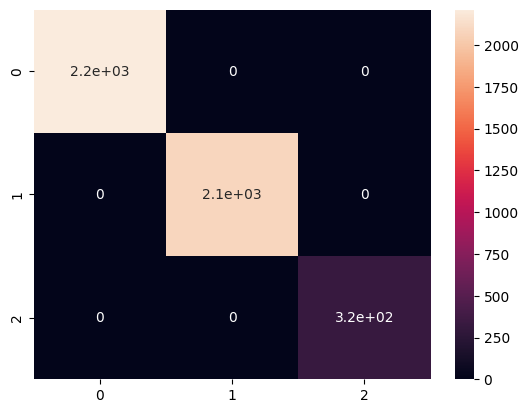



X_pet
Shape of the Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------
Shape of the SCALED Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------

Important feature:==========
pet_sale_id      0.670918
color_type       0.231259
X1               0.066246
X2               0.014762
condition_1.0    0.004586
height(cm)       0.004414
length(m)        0.003420
condition_2.0    0.002993
condition_0.0    0.001402
dtype: float64
Accuracy: 0.9997834560415765
F1 Score: 0.7999618393436367


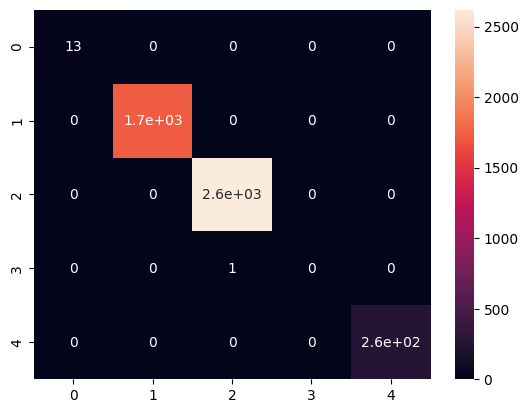

In [149]:
X = [X_breed, X_pet]
y = [y_breed, y_pet]

def model_building(X,y):


    for input, target in zip(X,y):

        print(get_variable_name(input))
        
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.33, random_state=42)


        print('Shape of the Training and Test Data')
        print(X_train.shape, X_test.shape)
        print(y_train.shape,y_test.shape)
        print("---------------------------")
        

        scaler = StandardScaler()

        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        print('Shape of the SCALED Training and Test Data')
        print(X_train_scaled.shape, X_test_scaled.shape)
        print(y_train.shape,y_test.shape)
        print("---------------------------\n")


        # Model 
        # Initialize and train the Random Forest classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train_scaled, y_train)

        feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

        print('Important feature:==========')
        print(feature_scores)


        # Make predictions on the test data
        y_pred = clf.predict(X_test_scaled)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate f1_score
        f1 = f1_score(y_test,y_pred, average='macro')
        print(f'F1 Score: {f1}')

        # Print classification report
        report = confusion_matrix(y_test, y_pred,)
        sns.heatmap(report,annot=True)
        plt.show()

        print('\n')


model_building(X,y)

## Validation

Shape of the Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------
Shape of the SCALED Training and Test Data
(9373, 9) (4618, 9)
(9373,) (4618,)
---------------------------

Accuracy: 0.9997834560415765
F1 Score: 0.7999618393436367


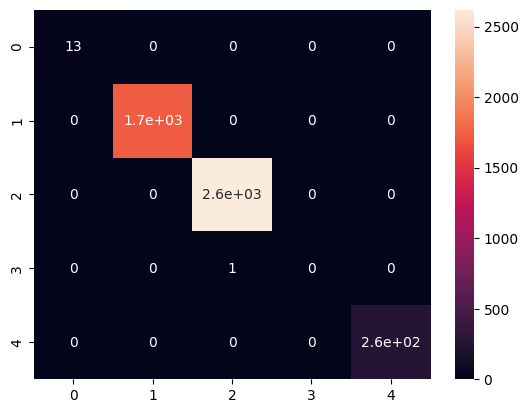

In [39]:
X_pet = train_pet[['pet_sale_id', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2','condition_0.0', 'condition_1.0', 'condition_2.0']]
y_pet = train_pet['pet_category']


X_train, X_test, y_train, y_test = train_test_split(X_pet, y_pet, test_size=0.33, random_state=42)


print('Shape of the Training and Test Data')
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)
print("---------------------------")


scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


print('Shape of the SCALED Training and Test Data')
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape,y_test.shape)
print("---------------------------\n")


# Model 
# Initialize and train the Random Forest classifier
model_pet = RandomForestClassifier(n_estimators=100, random_state=42)
model_pet.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model_pet.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate f1_score
f1 = f1_score(y_test,y_pred, average='macro')
print(f'F1 Score: {f1}')

# Print classification report
report = confusion_matrix(y_test, y_pred,)
sns.heatmap(report,annot=True)
plt.show()

print('\n')


In [40]:
input = [X_train_scaled[5191]]

model_pet.predict(X_train_scaled)

array([1, 1, 1, ..., 2, 1, 1])

In [41]:
X_train.iloc[5191,:]

pet_sale_id       1.634559
color_type        1.736326
length(m)         0.690000
height(cm)       48.390000
X1                0.000000
X2                1.000000
condition_0.0     0.000000
condition_1.0     1.000000
condition_2.0     0.000000
Name: 7997, dtype: float64

In [42]:
X_train_scaled[5191]

array([-1.00236088,  0.01488405,  0.64887109,  1.61624891, -0.87103427,
       -1.07944366, -0.69570746,  1.13825128, -0.55923617])

In [43]:
y_train

8544     1
6104     1
6066     1
11256    2
8695     1
        ..
5191     2
13418    2
5390     2
860      1
7270     1
Name: pet_category, Length: 9373, dtype: int64

## Production Ready: Combining two models

In [16]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

### Model: Breed Category

In [155]:
X_breed = train[['pet_sale_id','condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']]
y_breed = train['breed_category']


X_train, X_test, y_train, y_test = train_test_split(X_breed, y_breed, test_size=0.33, random_state=42)

In [156]:
X_breed

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_36614,0.0,Torbie,0.11,9.51,13,9
1,ANSL_22109,2.0,Brown Tabby,0.42,48.74,0,2
2,ANSL_27582,2.0,Black,0.90,34.45,13,9
3,ANSL_637,1.0,Flame Point,0.94,48.91,7,1
4,ANSL_27541,1.0,Yellow Brindle,0.78,17.07,0,7
...,...,...,...,...,...,...,...
13986,ANSL_34932,1.0,Yellow,0.74,43.17,0,1
13987,ANSL_8393,0.0,Calico,0.44,18.98,13,9
13988,ANSL_27370,0.0,Brown Brindle,1.00,24.39,7,1
13989,ANSL_37437,0.0,Brown Tabby,0.93,46.64,16,9


In [157]:
y_breed

0        1
1        0
2        1
3        0
4        0
        ..
13986    0
13987    1
13988    1
13989    1
13990    0
Name: breed_category, Length: 13991, dtype: int64

In [158]:
X_breed.isnull().sum()

pet_sale_id    0
condition      0
color_type     0
length(m)      0
height(cm)     0
X1             0
X2             0
dtype: int64

In [171]:
X_breed.head(1)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_36614,0.0,Torbie,0.11,9.51,13,9


In [221]:
X_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13991 entries, 0 to 13990
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pet_sale_id  13991 non-null  object 
 1   condition    13991 non-null  float64
 2   color_type   13991 non-null  object 
 3   length(m)    13991 non-null  float64
 4   height(cm)   13991 non-null  float64
 5   X1           13991 non-null  int64  
 6   X2           13991 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 765.3+ KB


In [231]:
# Imputing null
trf1_breed = ColumnTransformer([
    ('Target encoding', TargetEncoder(),[0,2]),
    ('impute_condition', SimpleImputer(strategy='most_frequent'),[1])
    ],remainder='passthrough'
)

#training the model
trf2_breed = RandomForestClassifier()

In [232]:
X_breed.shape

(13991, 7)

In [233]:
pd.DataFrame(trf1_breed.fit_transform(X_breed,y_breed), columns=X_breed.columns).head(1)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2
0,0.652193,1.02809,0.0,0.11,9.51,13.0,9.0


In [50]:
pipe_breed = Pipeline([
    ('trf1',trf1_breed),
    ('scale', StandardScaler()),
    ('trf2', trf2_breed)
])


In [51]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_breed, X_train, y_train, cv=5, scoring='accuracy').mean()

0.4479889576663109

In [52]:
import time
print('Training the Random Forest Model.....')

start_time = time.time()

# Define the parameter grid for each model
rf_param_grid = {'trf2__max_depth': [100,200,300],
                'trf2__max_features': [2, 3],
                'trf2__min_samples_leaf': [3,5,6,8,10],
                'trf2__min_samples_split': [8,12,14,16,20],
                'trf2__n_estimators': [100, 200]
                }

grid_breed = GridSearchCV(pipe_breed, rf_param_grid, cv=5, scoring='accuracy')
grid_breed.fit(X_train, y_train)

print(f'Best parameters: {grid_breed.best_params_}')
print(f'Train accuracy: {grid_breed.best_score_}')
print(f'Test accuracy: {grid_breed.score(X_test, y_test)}')
print('\n')

end_time = time.time()

print(f'The cell took {end_time - start_time} seconds to run.')

Training the Random Forest Model.....
Best parameters: {'trf2__max_depth': 300, 'trf2__max_features': 2, 'trf2__min_samples_leaf': 8, 'trf2__min_samples_split': 20, 'trf2__n_estimators': 100}
Train accuracy: 0.46367134827463535
Test accuracy: 0.4517106972715461


The cell took 440.1736719608307 seconds to run.


### Model: Pet Category

In [53]:
X_pet = train[['pet_sale_id','condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']]
y_pet = train['pet_category']


X_train, X_test, y_train, y_test = train_test_split(X_pet, y_pet, test_size=0.33, random_state=42)

In [54]:
# Imputing null
trf1_pet = ColumnTransformer([
    ('impute_condition', SimpleImputer(strategy='most_frequent'),[1]),
    ('Target encoding', TargetEncoder(), [0,2])
    ],remainder='passthrough'
)

#training the model
trf2_pet = RandomForestClassifier()

In [55]:
pipe_pet = Pipeline([
    ('trf1',trf1_pet),
    ('scale', StandardScaler()),
    ('trf2', trf2_pet)
])

cross_val_score(pipe_pet, X_train, y_train, cv=5, scoring='accuracy').mean()

0.5694015795090716

In [56]:
print('Training the Random Forest Model.....')

start_time = time.time()

# Define the parameter grid for each model
rf_param_grid = {'trf2__max_depth': [100,200,300],
                'trf2__max_features': [2, 3],
                'trf2__min_samples_leaf': [3,5,6,8,10],
                'trf2__min_samples_split': [8,12,14,16,20],
                'trf2__n_estimators': [100, 200]
                }

grid_pet = GridSearchCV(pipe_pet, rf_param_grid, cv=5, scoring='accuracy')
grid_pet.fit(X_train, y_train)

print(f'Best parameters: {grid_pet.best_params_}')
print(f'Train accuracy: {grid_pet.best_score_}')
print(f'Test accuracy: {grid_pet.score(X_test, y_test)}')
print('\n')

end_time = time.time()

print(f'The cell took {end_time - start_time} seconds to run.')

Training the Random Forest Model.....
Best parameters: {'trf2__max_depth': 300, 'trf2__max_features': 2, 'trf2__min_samples_leaf': 6, 'trf2__min_samples_split': 20, 'trf2__n_estimators': 100}
Train accuracy: 0.5718549128424049
Test accuracy: 0.5673451710697271


The cell took 546.5613570213318 seconds to run.


In [57]:
test

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_1354,2015-06-19 00:00:00,2015-07-24 13:20:00,2.0,Black,0.27,22.75,13,9
1,ANSL_22102,2015-08-28 00:00:00,2015-12-05 14:13:00,1.0,Black,0.57,21.17,0,1
2,ANSL_12994,2015-06-21 00:00:00,2015-10-30 18:08:00,1.0,Orange Tabby,0.00,34.34,0,1
3,ANSL_35930,2010-04-14 00:00:00,2018-05-10 14:55:00,0.0,Tan,0.46,44.66,13,9
4,ANSL_41868,2016-08-16 00:00:00,2016-09-16 19:06:00,NaN,Black,0.89,14.72,13,9
...,...,...,...,...,...,...,...,...,...
5992,ANSL_9471,2015-10-06 00:00:00,2015-11-04 16:50:00,2.0,Orange Tabby,0.60,32.68,13,9
5993,ANSL_49040,2017-04-13 00:00:00,2017-07-08 19:00:00,1.0,Chocolate,0.40,48.06,0,1
5994,ANSL_16530,2015-11-21 00:00:00,2016-03-12 12:37:00,1.0,Black,0.53,10.97,7,1
5995,ANSL_42416,2016-09-07 00:00:00,2017-12-04 12:22:00,1.0,Red,0.13,19.53,0,1


In [71]:
breed_pred = grid_breed.predict(test[['pet_sale_id','condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2']])
pet_pred = grid_pet.predict(test[['pet_sale_id','condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2']])

In [72]:
submission = pd.DataFrame(test['pet_sale_id'])

In [73]:
submission['breed_category'] = breed_pred
submission['pet_category'] = pet_pred

In [74]:
submission

,pet_sale_id,breed_category,pet_category
0,ANSL_1354,1,2
1,ANSL_22102,1,2
2,ANSL_12994,1,2
3,ANSL_35930,1,2
4,ANSL_41868,1,2
...,...,...,...
5992,ANSL_9471,1,2
5993,ANSL_49040,1,2
5994,ANSL_16530,1,2
5995,ANSL_42416,1,2


## Test Method: Only being used for now. 

In [55]:
train.head()

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,listing_year,listing_month,listing_day,listing_dayofweek,issue_year,issue_month,issue_day,issue_dayofweek,datediff_listing_to_issue
0,ANSL_36614,2011-01-12,2018-02-18 15:56:00,0.0,Torbie,0.11,9.51,13,9,1,1,2018,2,18,6,2011,1,12,2,224178960.0
1,ANSL_22109,2015-07-24,2015-10-14 12:06:00,2.0,Brown Tabby,0.42,48.74,0,2,0,1,2015,10,14,2,2015,7,24,4,7128360.0
2,ANSL_27582,2016-12-02,2017-02-11 14:24:00,2.0,Black,0.90,34.45,13,9,1,1,2017,2,11,5,2016,12,2,4,6186240.0
3,ANSL_637,2015-07-05,2015-10-13 17:40:00,1.0,Flame Point,0.94,48.91,7,1,0,1,2015,10,13,1,2015,7,5,6,8703600.0
4,ANSL_27541,2016-01-16,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,2,2017,8,31,3,2016,1,16,5,51300360.0


In [59]:
train['listing_date'] = pd.to_datetime(train['listing_date'])
train['listing_year'] = train['listing_date'].dt.year
train['listing_month'] = train['listing_date'].dt.month
train['listing_day'] = train['listing_date'].dt.day
train['listing_dayofweek'] = train['listing_date'].dt.dayofweek



train['issue_date'] = pd.to_datetime(train['issue_date'])
train['issue_year'] = train['issue_date'].dt.year
train['issue_month'] = train['issue_date'].dt.month
train['issue_day'] = train['issue_date'].dt.day
train['issue_dayofweek'] = train['issue_date'].dt.dayofweek


train['datediff_listing_to_issue'] = (train['listing_date'] - train['issue_date']).dt.total_seconds()
train['year_diff'] = train['listing_year'] - train['issue_year']


In [60]:
train

,pet_sale_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,...,listing_year,listing_month,listing_day,listing_dayofweek,issue_year,issue_month,issue_day,issue_dayofweek,datediff_listing_to_issue,year_diff
0,ANSL_36614,2011-01-12,2018-02-18 15:56:00,0.0,Torbie,0.11,9.51,13,9,1,...,2018,2,18,6,2011,1,12,2,224178960.0,7
1,ANSL_22109,2015-07-24,2015-10-14 12:06:00,2.0,Brown Tabby,0.42,48.74,0,2,0,...,2015,10,14,2,2015,7,24,4,7128360.0,0
2,ANSL_27582,2016-12-02,2017-02-11 14:24:00,2.0,Black,0.90,34.45,13,9,1,...,2017,2,11,5,2016,12,2,4,6186240.0,1
3,ANSL_637,2015-07-05,2015-10-13 17:40:00,1.0,Flame Point,0.94,48.91,7,1,0,...,2015,10,13,1,2015,7,5,6,8703600.0,0
4,ANSL_27541,2016-01-16,2017-08-31 18:06:00,1.0,Yellow Brindle,0.78,17.07,0,7,0,...,2017,8,31,3,2016,1,16,5,51300360.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13986,ANSL_34932,2015-06-10,2016-08-05 18:39:00,1.0,Yellow,0.74,43.17,0,1,0,...,2016,8,5,4,2015,6,10,2,36527940.0,1
13987,ANSL_8393,2014-05-16,2015-04-10 15:26:00,0.0,Calico,0.44,18.98,13,9,1,...,2015,4,10,4,2014,5,16,4,28481160.0,1
13988,ANSL_27370,2017-07-22,2018-07-29 08:38:00,0.0,Brown Brindle,1.00,24.39,7,1,1,...,2018,7,29,6,2017,7,22,5,32171880.0,1
13989,ANSL_37437,2017-06-08,2018-06-30 09:00:00,0.0,Brown Tabby,0.93,46.64,16,9,1,...,2018,6,30,5,2017,6,8,3,33469200.0,1


In [61]:
sorted(pd.to_datetime(train['listing_date']).dt.dayofweek.unique())

[0, 1, 2, 3, 4, 5, 6]

In [62]:
pd.to_datetime(train['issue_date']).dt.year

0        2011
1        2015
2        2016
3        2015
4        2016
         ... 
13986    2015
13987    2014
13988    2017
13989    2017
13990    2013
Name: issue_date, Length: 13991, dtype: int64

In [270]:
X = train[['pet_sale_id','condition', 'color_type','length(m)', 'height(cm)','X1', 'X2','year_diff','datediff_listing_to_issue']]
y = train['breed_category']

In [271]:
y.value_counts().sort_values()

2    1056
1    6285
0    6650
Name: breed_category, dtype: int64

In [272]:
class_frequencies = y.value_counts().sort_index().to_list()
max_frequency = max(class_frequencies)
imbalance_factors = [max_frequency / freq for freq in class_frequencies]
class_weights = [max(imbalance_factors) / factor for factor in imbalance_factors]

class_weights

[6.297348484848484, 5.951704545454545, 1.0]

In [273]:
cw = my_dict = dict(zip(y.value_counts().sort_index().index, class_weights))
cw

{0: 6.297348484848484, 1: 5.951704545454545, 2: 1.0}

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [275]:
encoder = TargetEncoder(cols = ['pet_sale_id','color_type'])

encoder.fit(X_train,y_train)

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [276]:
X_test_encoded.isnull().sum()

pet_sale_id                    0
condition                    320
color_type                     0
length(m)                      0
height(cm)                     0
X1                             0
X2                             0
year_diff                      0
datediff_listing_to_issue      0
dtype: int64

In [277]:
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(X_train_encoded, y_train)
X_train_imputed = imputer.transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

In [293]:
pd.DataFrame(X_train_imputed, columns=X_train.columns)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2,year_diff,datediff_listing_to_issue
0,0.526315,2.0,0.349081,0.78,41.96,0.0,1.0,0.0,10351380.0
1,0.656424,2.0,0.349081,0.93,20.94,0.0,7.0,1.0,33485760.0
2,0.526315,2.0,0.565421,0.29,11.54,13.0,9.0,0.0,3760500.0
3,0.526315,1.0,0.547038,0.79,15.96,0.0,1.0,2.0,49573800.0
4,0.656424,2.0,1.032787,0.05,34.25,16.0,9.0,1.0,9994560.0
...,...,...,...,...,...,...,...,...,...
9368,0.526315,1.0,0.547038,0.97,31.95,0.0,1.0,1.0,34001700.0
9369,0.526315,1.0,0.871413,0.57,25.99,0.0,7.0,1.0,41447400.0
9370,0.526315,1.0,0.557098,0.78,26.39,0.0,1.0,1.0,30814860.0
9371,0.526315,2.0,0.616625,0.42,26.36,16.0,9.0,1.0,33469200.0


In [278]:
pd.DataFrame(X_test_imputed, columns=X_train.columns)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2,year_diff,datediff_listing_to_issue
0,0.605036,0.0,0.582160,0.26,38.43,7.0,1.0,1.0,41447280.0
1,0.605036,0.0,0.483019,0.00,46.77,0.0,1.0,2.0,34106040.0
2,0.605036,2.0,0.557098,0.61,36.41,13.0,9.0,5.0,159970140.0
3,0.605036,0.0,0.871413,0.87,14.74,0.0,1.0,2.0,65978040.0
4,0.605036,2.0,0.616625,0.81,30.79,18.0,4.0,13.0,380629680.0
...,...,...,...,...,...,...,...,...,...
4613,0.605036,2.0,0.456729,0.77,49.24,0.0,7.0,6.0,187126500.0
4614,0.605036,0.0,0.485531,0.42,20.41,0.0,1.0,1.0,12416520.0
4615,0.605036,1.0,0.547038,0.50,23.51,0.0,1.0,1.0,37037460.0
4616,0.605036,2.0,1.032787,0.14,48.56,0.0,1.0,1.0,33949920.0


In [279]:
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train_imputed)
X_test_scaled = scale.transform(X_test_imputed)

In [280]:
pd.DataFrame(X_test_scaled, columns=X_test.columns)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2,year_diff,datediff_listing_to_issue
0,0.0,-1.222481,-0.127156,-0.827119,0.853233,0.178157,-1.079444,-0.456260,-0.343736
1,0.0,-1.222481,-0.682989,-1.719578,1.492144,-0.871034,-1.079444,-0.121895,-0.421882
2,0.0,1.458140,-0.267663,0.374268,0.698485,1.077463,1.194499,0.881199,0.917911
3,0.0,-1.222481,1.494546,1.266727,-0.961611,-0.871034,-1.079444,-0.121895,-0.082612
4,0.0,1.458140,0.066076,1.060775,0.267948,1.826885,-0.226715,3.556118,3.266777
...,...,...,...,...,...,...,...,...,...
4613,0.0,1.458140,-0.830380,0.923474,1.681366,-0.871034,0.626014,1.215564,1.206983
4614,0.0,-1.222481,-0.668907,-0.277913,-0.527243,-0.871034,-1.079444,-0.456260,-0.652761
4615,0.0,0.117830,-0.324063,-0.003311,-0.289759,-0.871034,-1.079444,-0.456260,-0.390678
4616,0.0,1.458140,2.399287,-1.239023,1.629272,-0.871034,-1.079444,-0.456260,-0.423544


In [281]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,pet_sale_id,condition,color_type,length(m),height(cm),X1,X2,year_diff,datediff_listing_to_issue
0,-0.961448,1.45814,-1.433910,0.957799,1.123659,-0.871034,-1.079444,-0.790625,-0.674744
1,0.627628,1.45814,-1.433910,1.472680,-0.486641,-0.871034,0.626014,-0.456260,-0.428485
2,-0.961448,1.45814,-0.221003,-0.724143,-1.206756,1.077463,1.194499,-0.790625,-0.744903
3,-0.961448,0.11783,-0.324063,0.992125,-0.868149,-0.871034,-1.079444,-0.121895,-0.257231
4,0.627628,1.45814,2.399287,-1.547951,0.533012,1.527116,1.194499,-0.456260,-0.678543
...,...,...,...,...,...,...,...,...,...
9368,-0.961448,0.11783,-0.324063,1.609981,0.356813,-0.871034,-1.079444,-0.456260,-0.422992
9369,-0.961448,0.11783,1.494546,0.236967,-0.099771,-0.871034,0.626014,-0.456260,-0.343735
9370,-0.961448,0.11783,-0.267663,0.957799,-0.069127,-0.871034,-1.079444,-0.456260,-0.456916
9371,-0.961448,1.45814,0.066076,-0.277913,-0.071426,1.527116,1.194499,-0.456260,-0.428661


In [282]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train_scaled, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 4438, 1: 4438, 2: 4438})


In [295]:
y_sm.value_counts()

0    4438
1    4438
2    4438
Name: breed_category, dtype: int64

In [285]:
model = RandomForestClassifier()

model.fit(X_sm, y_sm)

RandomForestClassifier()

In [286]:
y_pred = model.predict(X_test_scaled)

In [287]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print('Important feature:==========')
print(feature_scores)

Important feature:==========
pet_sale_id                  0.615227
condition                    0.243364
X1                           0.052045
X2                           0.040673
datediff_listing_to_issue    0.020362
color_type                   0.016341
year_diff                    0.009792
height(cm)                   0.001259
length(m)                    0.000939
dtype: float64


In [288]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate f1_score
f1 = f1_score(y_test,y_pred, average='macro')
print(f'F1 Score: {f1}')

Accuracy: 0.4517106972715461
F1 Score: 0.20743834526650753


In [290]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model for multiclass classification
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight= cw)

# Fit the model on the training data
model.fit(X_sm, y_sm)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy and print a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate f1_score
f1 = f1_score(y_test,y_pred, average='macro')
print(f'F1 Score: {f1}')

Accuracy: 0.45
F1 Score: 0.20743834526650753


In [291]:
import xgboost as xgb


# Create an XGBoost multiclass classification model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train))

# Fit the model on the training data
model.fit(X_sm, y_sm)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy and print a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate f1_score
f1 = f1_score(y_test,y_pred, average='macro')
print(f'F1 Score: {f1}')

Accuracy: 0.48
F1 Score: 0.2159102000976086
